In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle
from selenium import webdriver
from bs4 import BeautifulSoup as Soup
from urllib.request import urlopen as u_req
from urllib import error
import urllib
import requests
from IPython.core.debugger import set_trace
from permile import get_soup
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.style
import matplotlib as mpl
from sklearn import preprocessing
from milemod import *
%matplotlib inline

In [2]:
with open('/Users/ahakso/Documents/gitDir/permileFlask/mysite/static/combined_frame.pkl','rb') as f:
    df = pickle.load(f)

In [5]:
tgt_make = 'Volkswagen'
tgt_model = 'Tiguan'
tgt_year = 2013
neighbs, neighbs_all = nearest_neighbors(df, tgt_make, tgt_model, tgt_year, n_neighbors=20)

(0.0, 5.25)


(0, 7.0)

(0.1, 0.5)

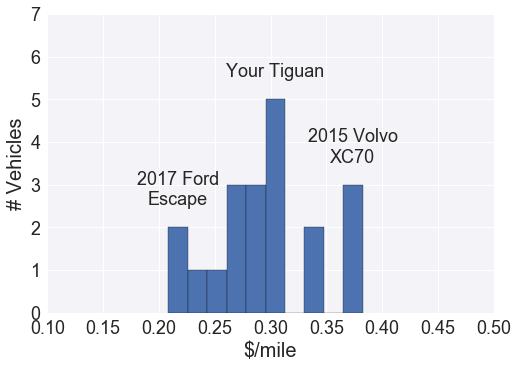

In [88]:
def context_hist(neighbs, neighbs_all, tgt_make, tgt_model, tgt_year):
    # Make histogram
    mpl.style.use('seaborn')
    costs = neighbs.total.values
    fig = plt.figure()
    fig.patch.set_alpha(0.5)
    ax = fig.add_subplot(111)
    ax.patch.set_alpha(0.5)

#     set_trace()
    count,bins,_ = ax.hist(costs,edgecolor='black')
    yl = ax.get_ylim()
    print(yl)
    ax.set_xlabel('$/mile',fontsize=20)
    ax.set_ylabel('# Vehicles',fontsize=20)
    plt.tick_params(labelsize=18)

    # Label bars
    idx = (neighbs_all.make==tgt_make) & (neighbs_all.model==tgt_model) & (neighbs_all.year==tgt_year)
    cost_tgt = neighbs_all.loc[idx,'total'].values[0]
    idx_min = np.argmin(neighbs.total.values)
    idx_max = np.argmax(neighbs.total.values)
    (cost_tgt >= bins) & (cost_tgt <=bins)
    sample_costs = (cost_tgt,costs[idx_min],costs[idx_max])
    mdlstrs = ('Your {}'.format(tgt_model),\
               '{} {}\n{}'.format(neighbs.year.iloc[idx_min],neighbs.make.iloc[idx_min],neighbs.model.iloc[idx_min]),\
               '{} {}\n{}'.format(neighbs.year.iloc[idx_max],neighbs.make.iloc[idx_max],neighbs.model.iloc[idx_max]))
    for (cost, mdlstr) in zip(sample_costs, mdlstrs):
        bar_idx = int(np.nonzero((cost >= bins[:-1]) & (cost <= bins[1:]))[0][0])
        xx = np.mean([bins[bar_idx],bins[bar_idx+1]])
    #     xx = bins[bar_idx]
        yy = count[bar_idx]+yl[1]/10
        plt.text(xx,yy,mdlstr,fontsize=18,ha='center')
    return ax, yl
ax,yl = context_hist(neighbs, neighbs_all, tgt_make, tgt_model, tgt_year)
y_upper = np.round(1.25*yl[1])
ax.set_ylim(0,y_upper)
ax.set_xlim(0.1,0.5)
# ax.set_ybound(None,np.round(1.25*yl[1]))

In [8]:
df_g = df.groupby(['make','model','year']).count()

all_makes = df_g.index.remove_unused_levels().levels[0].values

d = {}
for make in all_makes:
    subset_mdls = df_g.loc[make].index.remove_unused_levels().levels[0].values
    d[make] = dict(zip(subset_mdls,np.tile(np.array([]),(len(subset_mdls),1))))
    for mdl in subset_mdls:
        d[make][mdl] = df_g.loc[(make,mdl),].index.values

In [11]:
with open('/Users/ahakso/Documents/gitDir/permileFlask/mysite/static/combined_frame_dict.pkl','wb') as f:
    pickle.dump(d,f)

In [14]:
type(d)

dict